In [ ]:
import pandas as pd

df = pd.read_csv('netflix_titles.csv')

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [30]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2214
cast             671
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [31]:



df = df.dropna(subset=[ 'country', 'date_added', 'rating', 'duration'])


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7961 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7961 non-null   object
 1   type          7961 non-null   object
 2   title         7961 non-null   object
 3   director      5747 non-null   object
 4   cast          7290 non-null   object
 5   country       7961 non-null   object
 6   date_added    7961 non-null   object
 7   release_year  7961 non-null   int64 
 8   rating        7961 non-null   object
 9   duration      7961 non-null   object
 10  listed_in     7961 non-null   object
 11  description   7961 non-null   object
dtypes: int64(1), object(11)
memory usage: 808.5+ KB


In [33]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2214
cast             671
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

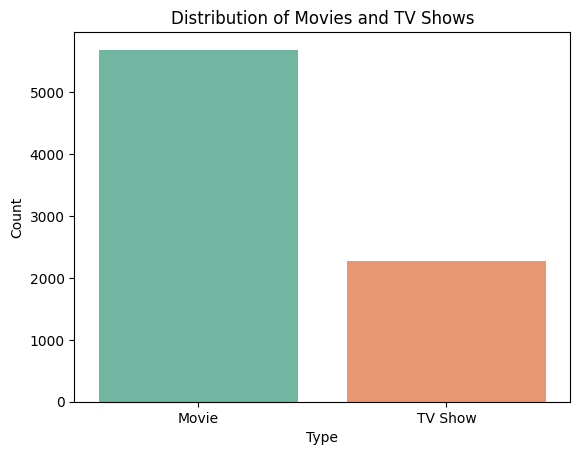

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


sns.countplot(x='type', hue='type', data=df, palette='Set2', legend=False)

plt.title('Distribution of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


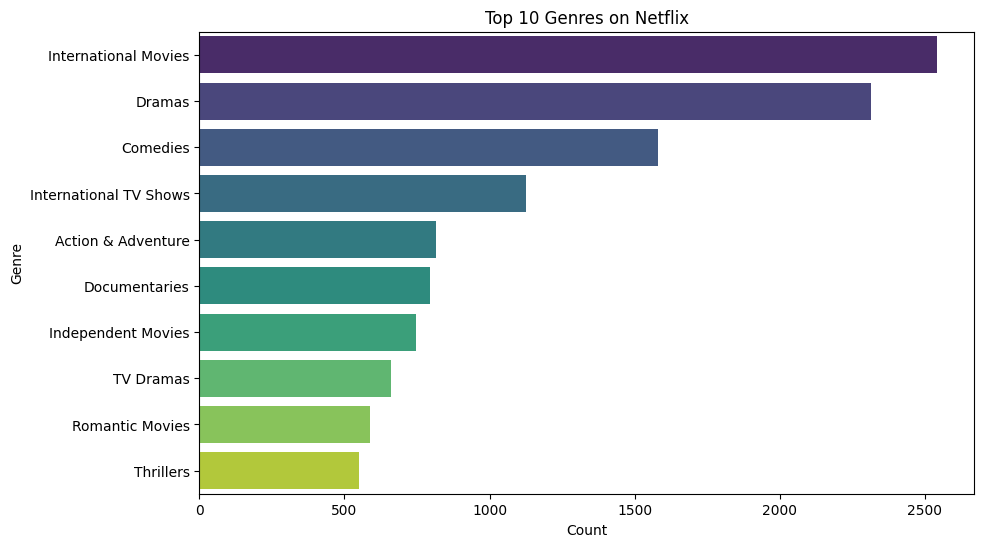

In [ ]:

genre_data = df['listed_in'].str.split(',').explode().str.strip()
top_genres = genre_data.value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, hue=top_genres.index, palette='viridis', legend=False)
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


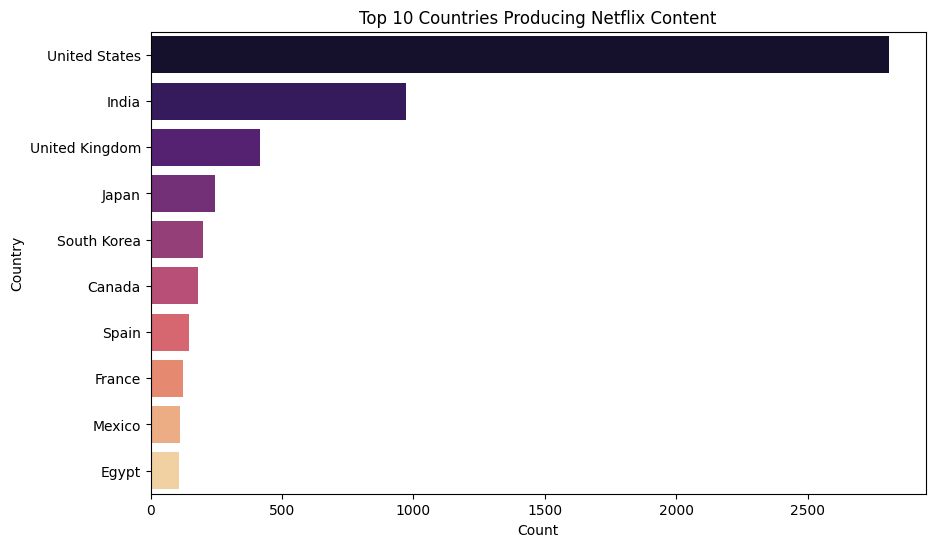

In [19]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index,hue=top_countries.index, palette='magma')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


In [23]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip())


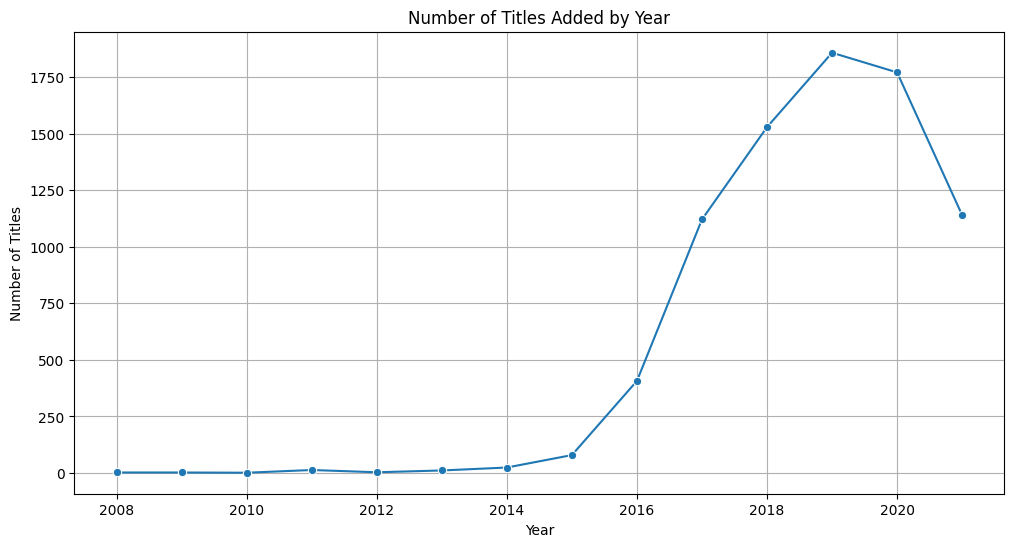

In [24]:

df['date_added'] = pd.to_datetime(df['date_added'])


df['year_added'] = df['date_added'].dt.year
titles_per_year = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=titles_per_year.index, y=titles_per_year.values, marker='o')
plt.title('Number of Titles Added by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


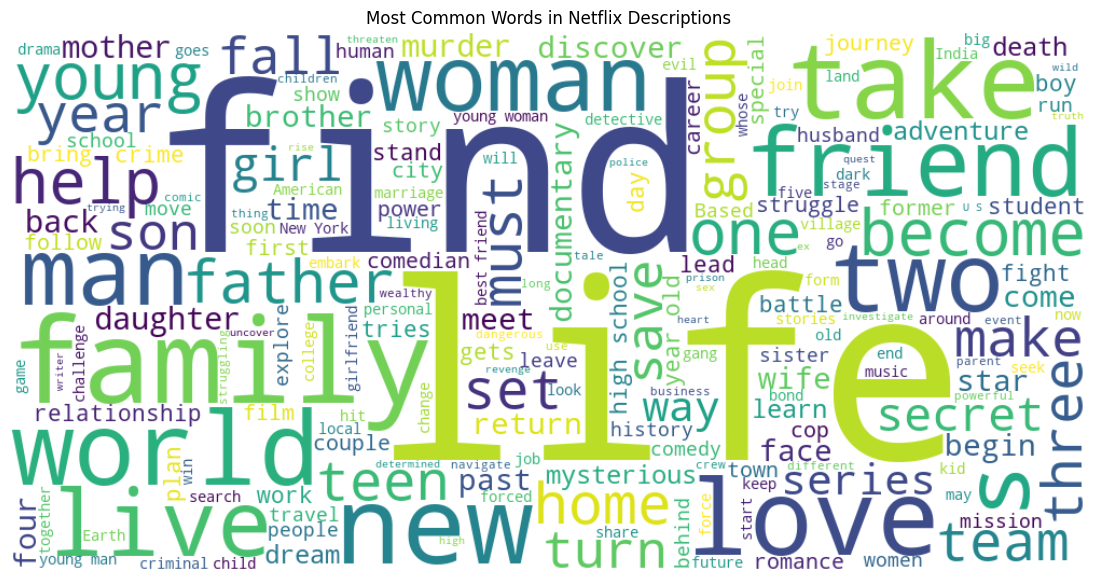

In [25]:

text = " ".join(df['description'].dropna())
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Descriptions')
plt.show()
